<a href="https://colab.research.google.com/github/BustamJos3/ia4eng_jdbs_afmp_project/blob/workOnModels%2FBustamJos3/01_exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
* dataset loading
* NaN induction
* Data exploration

# Modules

In [ ]:
#modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import seaborn as sns
import sklearn as sk
from scipy import stats

In [ ]:
#call API
!pip install kaggle
#upload kaggle token .json
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bustamjos3","key":"a80d020fd1917115be9ce5ce749b71d9"}'}

# Charge data for Forest Cover

In [ ]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
#API from forest cover dataset
!kaggle competitions download -c forest-cover-type-prediction
#unzip files
file_name = 'forest-cover-type-prediction.zip' #the file is the dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
# .zip is now not necessary
!rm *.zip

 67% 17.0M/25.3M [00:00<00:00, 43.6MB/s]
100% 25.3M/25.3M [00:00<00:00, 58.0MB/s]
Done


# Data exploration

In [ ]:
#create DF from train
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Nan and categorical values induction

In [ ]:
#lets check categorical cols
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15116,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15117,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15118,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Criteria to induction of Nan values
Because there are not nan values on dataset, it is needed to push them into it. At least 5% of data must be Nan values. So, the aproximation is this:


*   A column (variable) will be selected according with an random number (e.g: if the number is 1, then the column selected will be the first of the variable columns; the ```'id'``` column will not be selected, only the columns having cartographic variables).
*   With the column selected, the data to be converted to Nan will be choosen with a new random number indicanting its index.
*   This will be repeated until reach the 5% of Nan values requested.





#### Start of the cycle to Nan induction

In [ ]:
#threshold to work induction with
threshold=int(len(df_train)*0.5)
threshold

7560

In [ ]:
#take all column labels to select from iterable with index being col_choosen
list_cols=list(df_train.columns)
#let see if it worked with the first 5 elements
list_cols[:5]

['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']

In [ ]:
#count var to compare with threshold
count_nan=0
# cycle
while count_nan<threshold:
    #random for column and row selection
    col_choosen=np.random.randint(1,df_train.shape[1])
    row_choosen=np.random.randint(1,df_train.shape[0])
    #localization of value in which to push nan value
    if df_train.loc[row_choosen,list_cols[col_choosen]]!=np.NaN:
        df_train.loc[row_choosen,list_cols[col_choosen]]=np.NaN
        #add 1 to counter
        count_nan+=1

In [ ]:
#check amount of nan values
df_count_nan=df_train.isna().sum()
#let see the amount of nan for the first 20 cols
df_count_nan[df_count_nan!=0].iloc[:20]

Elevation                             134
Aspect                                118
Slope                                 115
Horizontal_Distance_To_Hydrology      137
Vertical_Distance_To_Hydrology        142
Horizontal_Distance_To_Roadways       145
Hillshade_9am                         134
Hillshade_Noon                        132
Hillshade_3pm                         135
Horizontal_Distance_To_Fire_Points    130
Wilderness_Area1                      131
Wilderness_Area2                      129
Wilderness_Area3                      134
Wilderness_Area4                      123
Soil_Type1                            144
Soil_Type2                            130
Soil_Type3                            168
Soil_Type4                            146
Soil_Type5                            127
Soil_Type6                            137
dtype: int64

### Nan value imputation 1
The criteria that will be used to replace the Nan values is the next
1. Because the amount of Nan values is 5%, the imputation depents on what distribution follows the data and what is its type.
#### Numerical data

1.   If its distribution is normal, the replacing will be done with the **mean**.
2.   If it is not normal, the replacing will be done with with the **median**.
#### Categorical data


1.   The replacing will be done with the **mode**.






## Visual normality checks
1. For every numeric column, plot qq chart and check visually.

In [ ]:
#get numeric columns
df_to_qq=df_train.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points'].copy()

### QQ plots

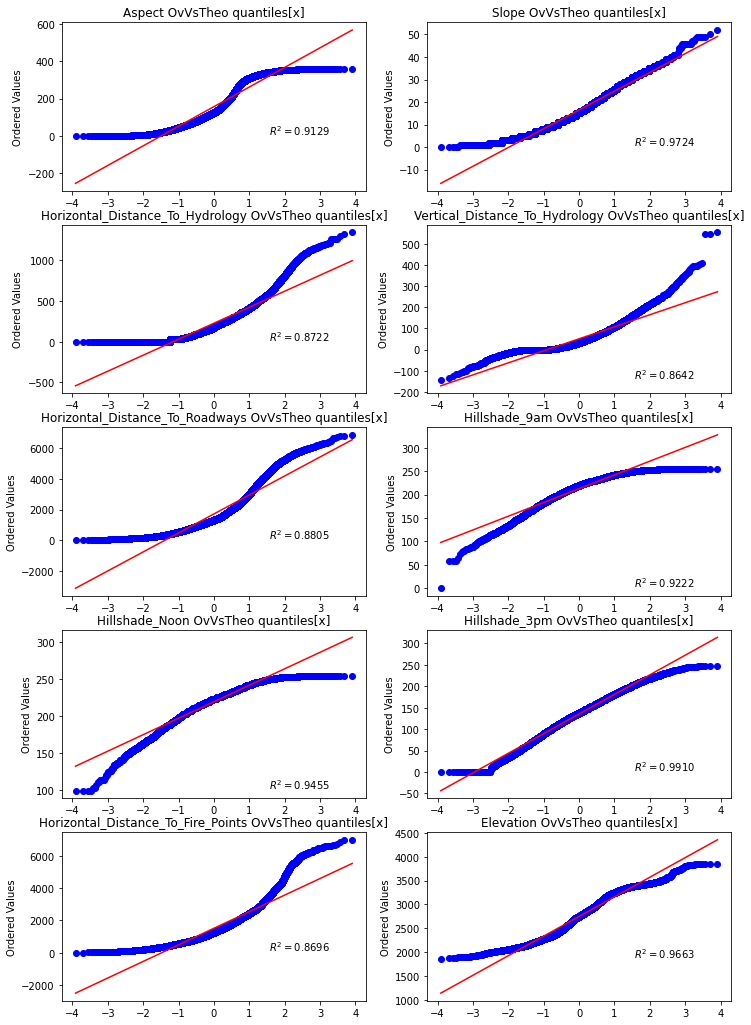

In [ ]:
#replot of q-q with fillin nans with 'ffill' method
list_qq_cols=[i for i in df_to_qq.columns]
fig, axs = plt.subplots(5, 2,figsize=(12, 18))
for i in range(len(list_qq_cols)):
    axs = plt.subplot('52'+str(i))
    x = np.array(df_to_qq[list_qq_cols[i]].fillna(method='ffill').values)
    res = stats.probplot(x, plot=plt,rvalue=True)
    axs.set_title(list_qq_cols[i]+' OvVsTheo quantiles[x]')
    axs.set_xlabel('')

plt.savefig('visual_normality_test_qq.png')
plt.show()

## Conclusion
For every column with a $R^2>0.9$, it can be concluded that the distribution is normal. For values below that, the distribution is not normal and the filling will be with the **median**

### NaN imputation
1. Replacing with **mean**

In [ ]:
#calculate mean of such cols, then replace it if NaN is found
mean_cols=["Aspect","Slope","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Elevation"]
for i in mean_cols:
    respective_mean=df_train[i].mean()
    #necessary to cast from int64 to float64
    df_train[i]=df_train[i].astype('float64').fillna(respective_mean)
df_train.loc[:,mean_cols]

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Elevation
0,51.0,3.0,221.0,232.0,148.0,2596.0
1,56.0,2.0,220.0,235.0,151.0,2590.0
2,139.0,9.0,234.0,238.0,135.0,2804.0
3,155.0,18.0,238.0,238.0,122.0,2785.0
4,45.0,2.0,220.0,234.0,150.0,2595.0
...,...,...,...,...,...,...
15115,243.0,23.0,170.0,251.0,214.0,2607.0
15116,121.0,19.0,249.0,221.0,91.0,2603.0
15117,134.0,25.0,250.0,220.0,83.0,2492.0
15118,167.0,28.0,229.0,237.0,119.0,2487.0


2. Replacing with **median**

In [ ]:
#calculate median of such cols, then replace it if NaN is found
median_cols=["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]
for i in median_cols:
    respective_median=df_train[i].median()
    #necessary to cast from int64 to float64
    df_train[i]=df_train[i].astype('float64').fillna(respective_median)
df_train.loc[:,median_cols]

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
0,258.0,0.0,510.0,6279.0
1,212.0,-6.0,390.0,6225.0
2,268.0,65.0,3180.0,6121.0
3,242.0,118.0,3090.0,6211.0
4,153.0,-1.0,391.0,6172.0
...,...,...,...,...
15115,258.0,7.0,660.0,1282.0
15116,633.0,195.0,618.0,1325.0
15117,365.0,117.0,335.0,1187.0
15118,218.0,101.0,242.0,932.0


3. Replacing with mode

In [ ]:
#choose cols that there are not numeric
selection_cols=df_train.columns
mode_cols=[]
for i in selection_cols:
    if i not in mean_cols:
        if i not in median_cols:
            mode_cols.append(i)
            respective_mode=df_train[i].mode().values[0].astype('int64')
            df_train[i]=df_train[i].fillna(respective_mode)
df_train.loc[:,mode_cols]

,Id,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15116,15117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15117,15118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15118,15119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
# cols of train
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [ ]:
# get the type values of every col
df_train.dtypes

Id                                      int64
Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                      float64
Wilderness_Area2                      float64
Wilderness_Area3                      float64
Wilderness_Area4                      float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                        

### Inspect numeric cols

In [ ]:
#because ._get_numeric_data().describe.T.iloc['Elevation':] rise an error working with dtype object(really strings), convert to best possible type
df_train=df_train.convert_dtypes()
df_train.dtypes

Id                                      Int64
Elevation                             Float64
Aspect                                Float64
Slope                                 Float64
Horizontal_Distance_To_Hydrology        Int64
Vertical_Distance_To_Hydrology          Int64
Horizontal_Distance_To_Roadways         Int64
Hillshade_9am                         Float64
Hillshade_Noon                        Float64
Hillshade_3pm                         Float64
Horizontal_Distance_To_Fire_Points      Int64
Wilderness_Area1                        Int64
Wilderness_Area2                        Int64
Wilderness_Area3                        Int64
Wilderness_Area4                        Int64
Soil_Type1                              Int64
Soil_Type2                              Int64
Soil_Type3                              Int64
Soil_Type4                              Int64
Soil_Type5                              Int64
Soil_Type6                              Int64
Soil_Type7                        

In [ ]:
# head description of df_train with only numeric data--->not categorical
df_train._get_numeric_data().describe().T.loc['Elevation':'Horizontal_Distance_To_Fire_Points',:]

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.328507,416.024970,1863.0,2378.0,2749.328507,3100.00,3849.0
Aspect,15120.0,156.501733,109.665315,0.0,65.0,126.000000,259.00,360.0
Slope,15120.0,16.502099,8.421000,0.0,10.0,15.000000,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,226.588624,208.932035,0.0,67.0,180.000000,324.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,50.780357,60.853767,-146.0,5.0,32.000000,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1710.934590,1319.233739,0.0,767.0,1316.000000,2255.25,6890.0
Hillshade_9am,15120.0,212.717003,30.459105,0.0,196.0,219.000000,235.00,254.0
Hillshade_Noon,15120.0,218.975314,22.697423,99.0,207.0,222.000000,235.00,254.0
Hillshade_3pm,15120.0,135.111378,45.708655,0.0,107.0,137.500000,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1508.711045,1094.893095,0.0,732.0,1256.000000,1982.00,6993.0


## Inspect target variable

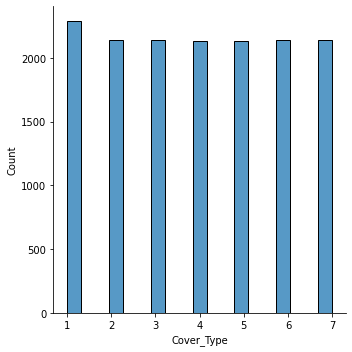

In [ ]:
#plot target column (categorical)
sns.displot(df_train['Cover_Type']).savefig('distribution_cover_type.jpg');

### Feature selection
Several methods will be applied, in order to get the best combination of features to train the model.
#### Filter methods: pre-processing step
We will begin with one of the filter methods: **Correlation coefficient or Pearson's correlation**

#### 1. Correlation matrix

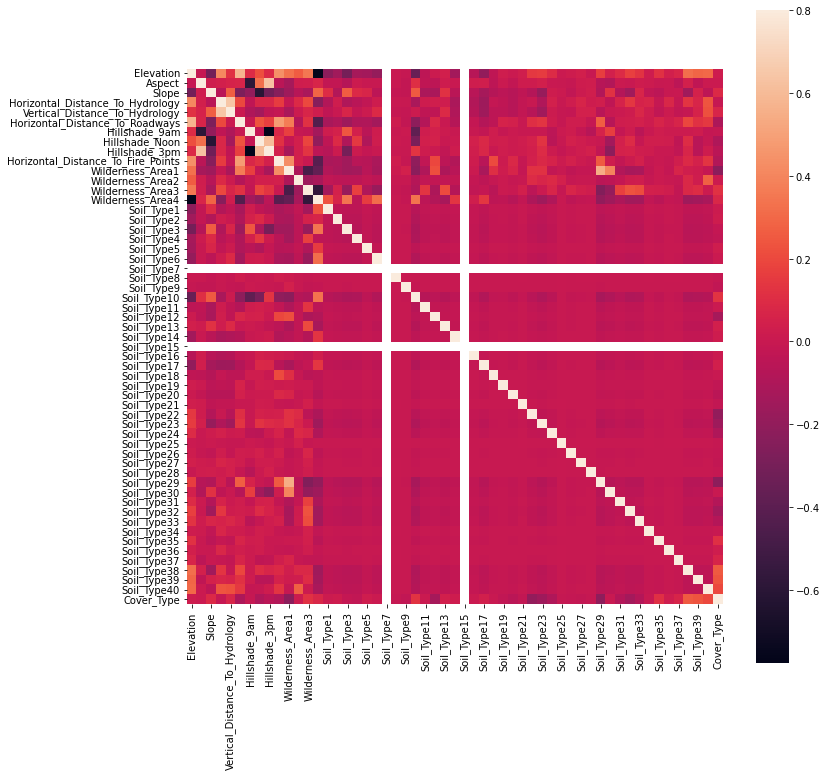

In [ ]:
#correlation matrix
corrmat = df_train.corr().loc['Elevation':,'Elevation':]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_heatmap.png')

In [ ]:
#correlation matrix with numeric variables
list_cols_numeric=list(df_train.corr().loc[ 'Elevation':'Horizontal_Distance_To_Fire_Points','Elevation':'Horizontal_Distance_To_Fire_Points'].columns)
list_index_numeric=list(df_train.corr().loc[ 'Elevation':'Horizontal_Distance_To_Fire_Points','Elevation':'Horizontal_Distance_To_Fire_Points'].index)
list_cols_numeric.append('Cover_Type')
list_index_numeric.append('Cover_Type')

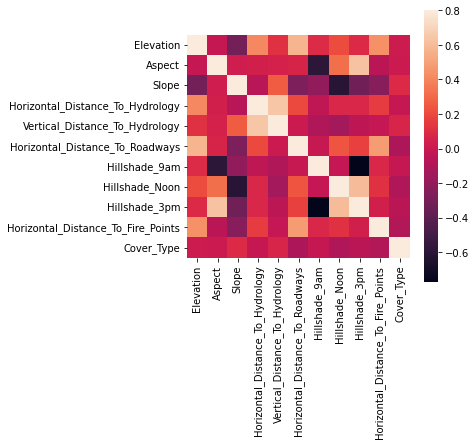

In [ ]:
corrmat_numeric=corrmat.loc[list_index_numeric,list_cols_numeric]
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat_numeric, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_numeric_heatmap.png')

In [ ]:
#correlation matrix with categorical variables
list_cols_categorical=list(df_train.corr().loc[ 'Wilderness_Area1':'Soil_Type40','Wilderness_Area1':'Soil_Type40'].columns)
list_index_categorical=list(df_train.corr().loc[ 'Wilderness_Area1':'Soil_Type40','Wilderness_Area1':'Soil_Type40'].index)
list_cols_categorical.append('Cover_Type')
list_index_categorical.append('Cover_Type')

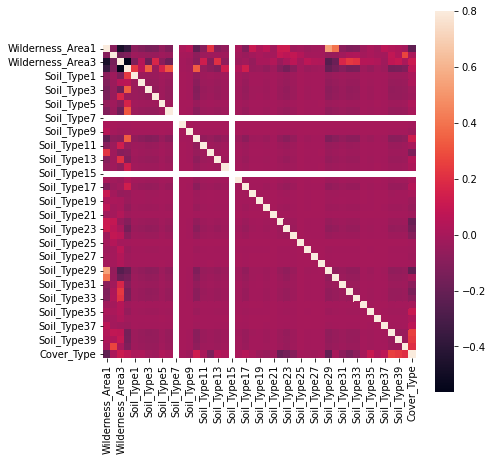

In [ ]:
corrmat_categorical=corrmat.loc[list_index_categorical,list_cols_categorical]
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat_categorical, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_categorical_heatmap.png')

In [ ]:
# get cols with correlation greater than .1 except 'Cover_Type'
most_corr_cols=corrmat['Cover_Type'][corrmat['Cover_Type']>.1]
most_corr_cols

Wilderness_Area3    0.118674
Soil_Type10         0.126358
Soil_Type35         0.113494
Soil_Type38         0.254363
Soil_Type39         0.234277
Soil_Type40         0.202606
Cover_Type          1.000000
Name: Cover_Type, dtype: float64

In [ ]:
#lets see the maximum correlation
corrmat['Cover_Type'][:'Soil_Type40'].max()

0.2543634205465271

#### Correlation conclusion
Because the maximum correlation is that low, the relation between the target value ```'Cover_Type'``` and the other variables is not **linear** and it is needed to stablish **non-linear** relations.
##### Other feature selection techniques
In order to find those variables and their relation with ```'Cover_Type'```, first ```feature importance``` will be applied with the help of the ```sklearn``` module.



# Export data in .json to chaining with subsequents notebooks

In [ ]:
df_train.to_json('01exploracion.json',orient='index')